In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
file_path = 'C:/Users/SPANDANA PRIYA/Downloads/Kolkatha_ExcelSheet.csv'
data = pd.read_csv(file_path)

In [38]:
data['PRICE_UNIT'] = data['PRICE'].str.extract(r'(Crore|Lakh)')
data['PRICE_NUM'] = (
    pd.to_numeric(
        data['PRICE'].str.replace(r'[^\d.]', '', regex=True),
        errors='coerce'
    )
)
data.loc[data['PRICE_UNIT'] == 'Crore', 'PRICE_NUM'] *= 100
data['PRICE_CLEANED'] = data['PRICE_NUM']

Distribution of Car Prices

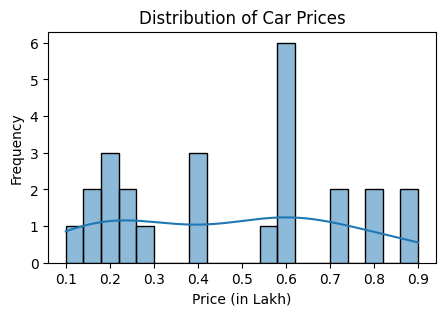

In [39]:
plt.figure(figsize=(5, 3))
sns.histplot(data['PRICE_CLEANED'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Lakh)')
plt.ylabel('Frequency')
plt.show()

Mileage vs Price

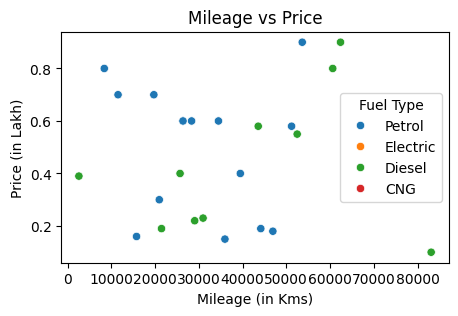

In [40]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='MILEGE(in Kms)', y='PRICE_CLEANED', hue='FUEL', data=data)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (in Kms)')
plt.ylabel('Price (in Lakh)')
plt.legend(title='Fuel Type')
plt.show()

Count of Cars by Fuel Type

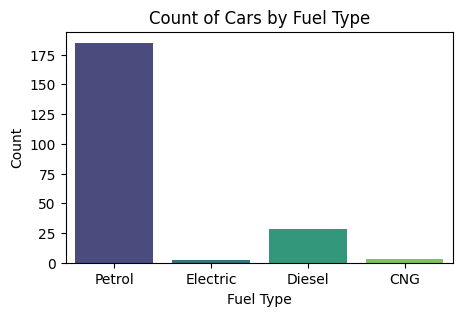

In [41]:
plt.figure(figsize=(5, 3))
sns.countplot(x='FUEL', data=data, palette='viridis', hue='FUEL')
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend([],[], frameon=False) 
plt.show()

Average Price by Location

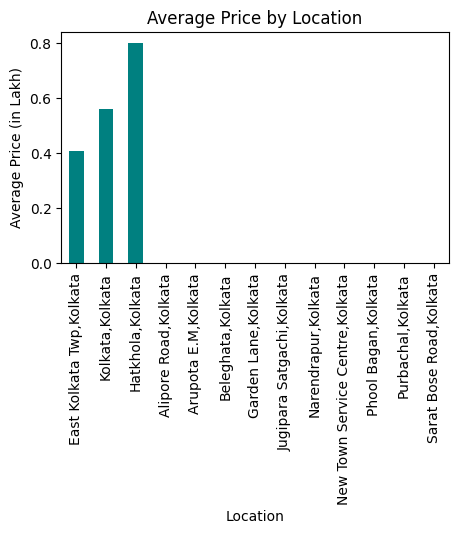

In [42]:
avg_price_by_location = data.groupby('LOCATION')['PRICE_CLEANED'].mean().sort_values()
plt.figure(figsize=(5, 3))
avg_price_by_location.plot(kind='bar', color='teal')
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (in Lakh)')
plt.show()

Mileage by Fuel Type

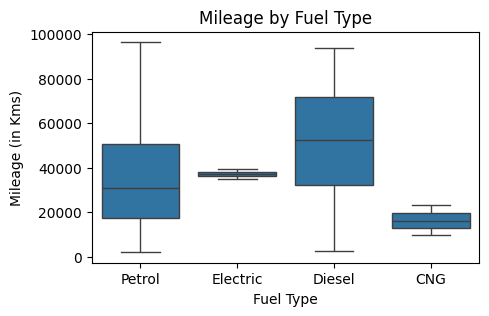

In [58]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='FUEL', y='MILEGE(in Kms)', data=data)
plt.title('Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (in Kms)')
plt.show()

Top 10 Expensive Cars

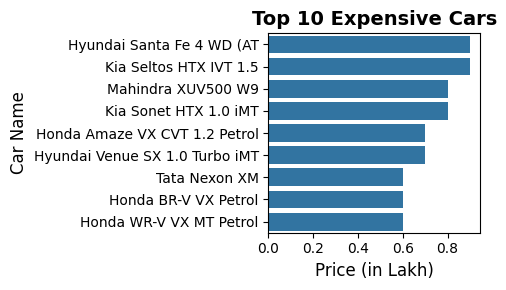

In [63]:
top_10_cars = data.nlargest(10, 'PRICE_CLEANED')
plt.figure(figsize=(5, 3))
sns.barplot(x='PRICE_CLEANED', y='NAME OF THE CARS', data=top_10_cars)
plt.title('Top 10 Expensive Cars', fontsize=14, fontweight='bold')
plt.xlabel('Price (in Lakh)', fontsize=12)
plt.ylabel('Car Name', fontsize=12)
plt.tight_layout()
plt.show()

Count of Cars by Location

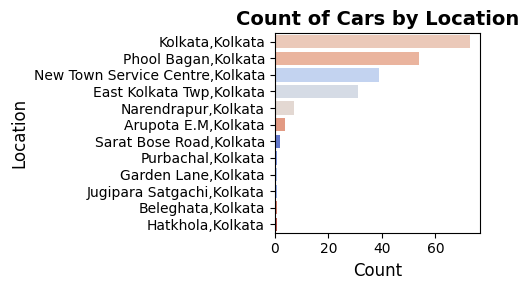

In [68]:
plt.figure(figsize=(5, 3))
sns.countplot(y='LOCATION', data=data, order=data['LOCATION'].value_counts().index, hue='LOCATION', palette='coolwarm')
plt.title('Count of Cars by Location', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

Price Distribution by Fuel Type

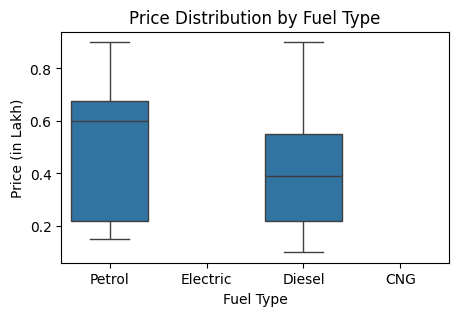

In [70]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='FUEL', y='PRICE_CLEANED', data=data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakh)')
plt.show()

Correlation Heatmap

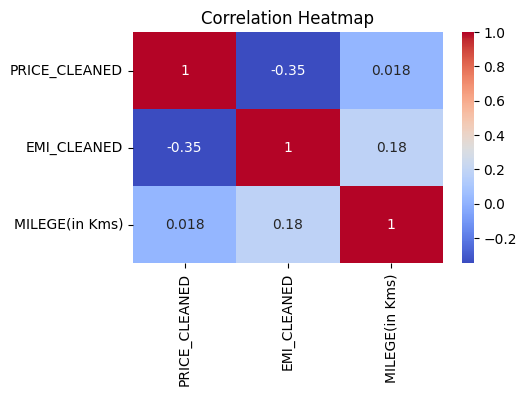

In [72]:
plt.figure(figsize=(5, 3))
sns.heatmap(data[['PRICE_CLEANED', 'EMI_CLEANED', 'MILEGE(in Kms)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Price vs Mileage by Location (Facet Grid)

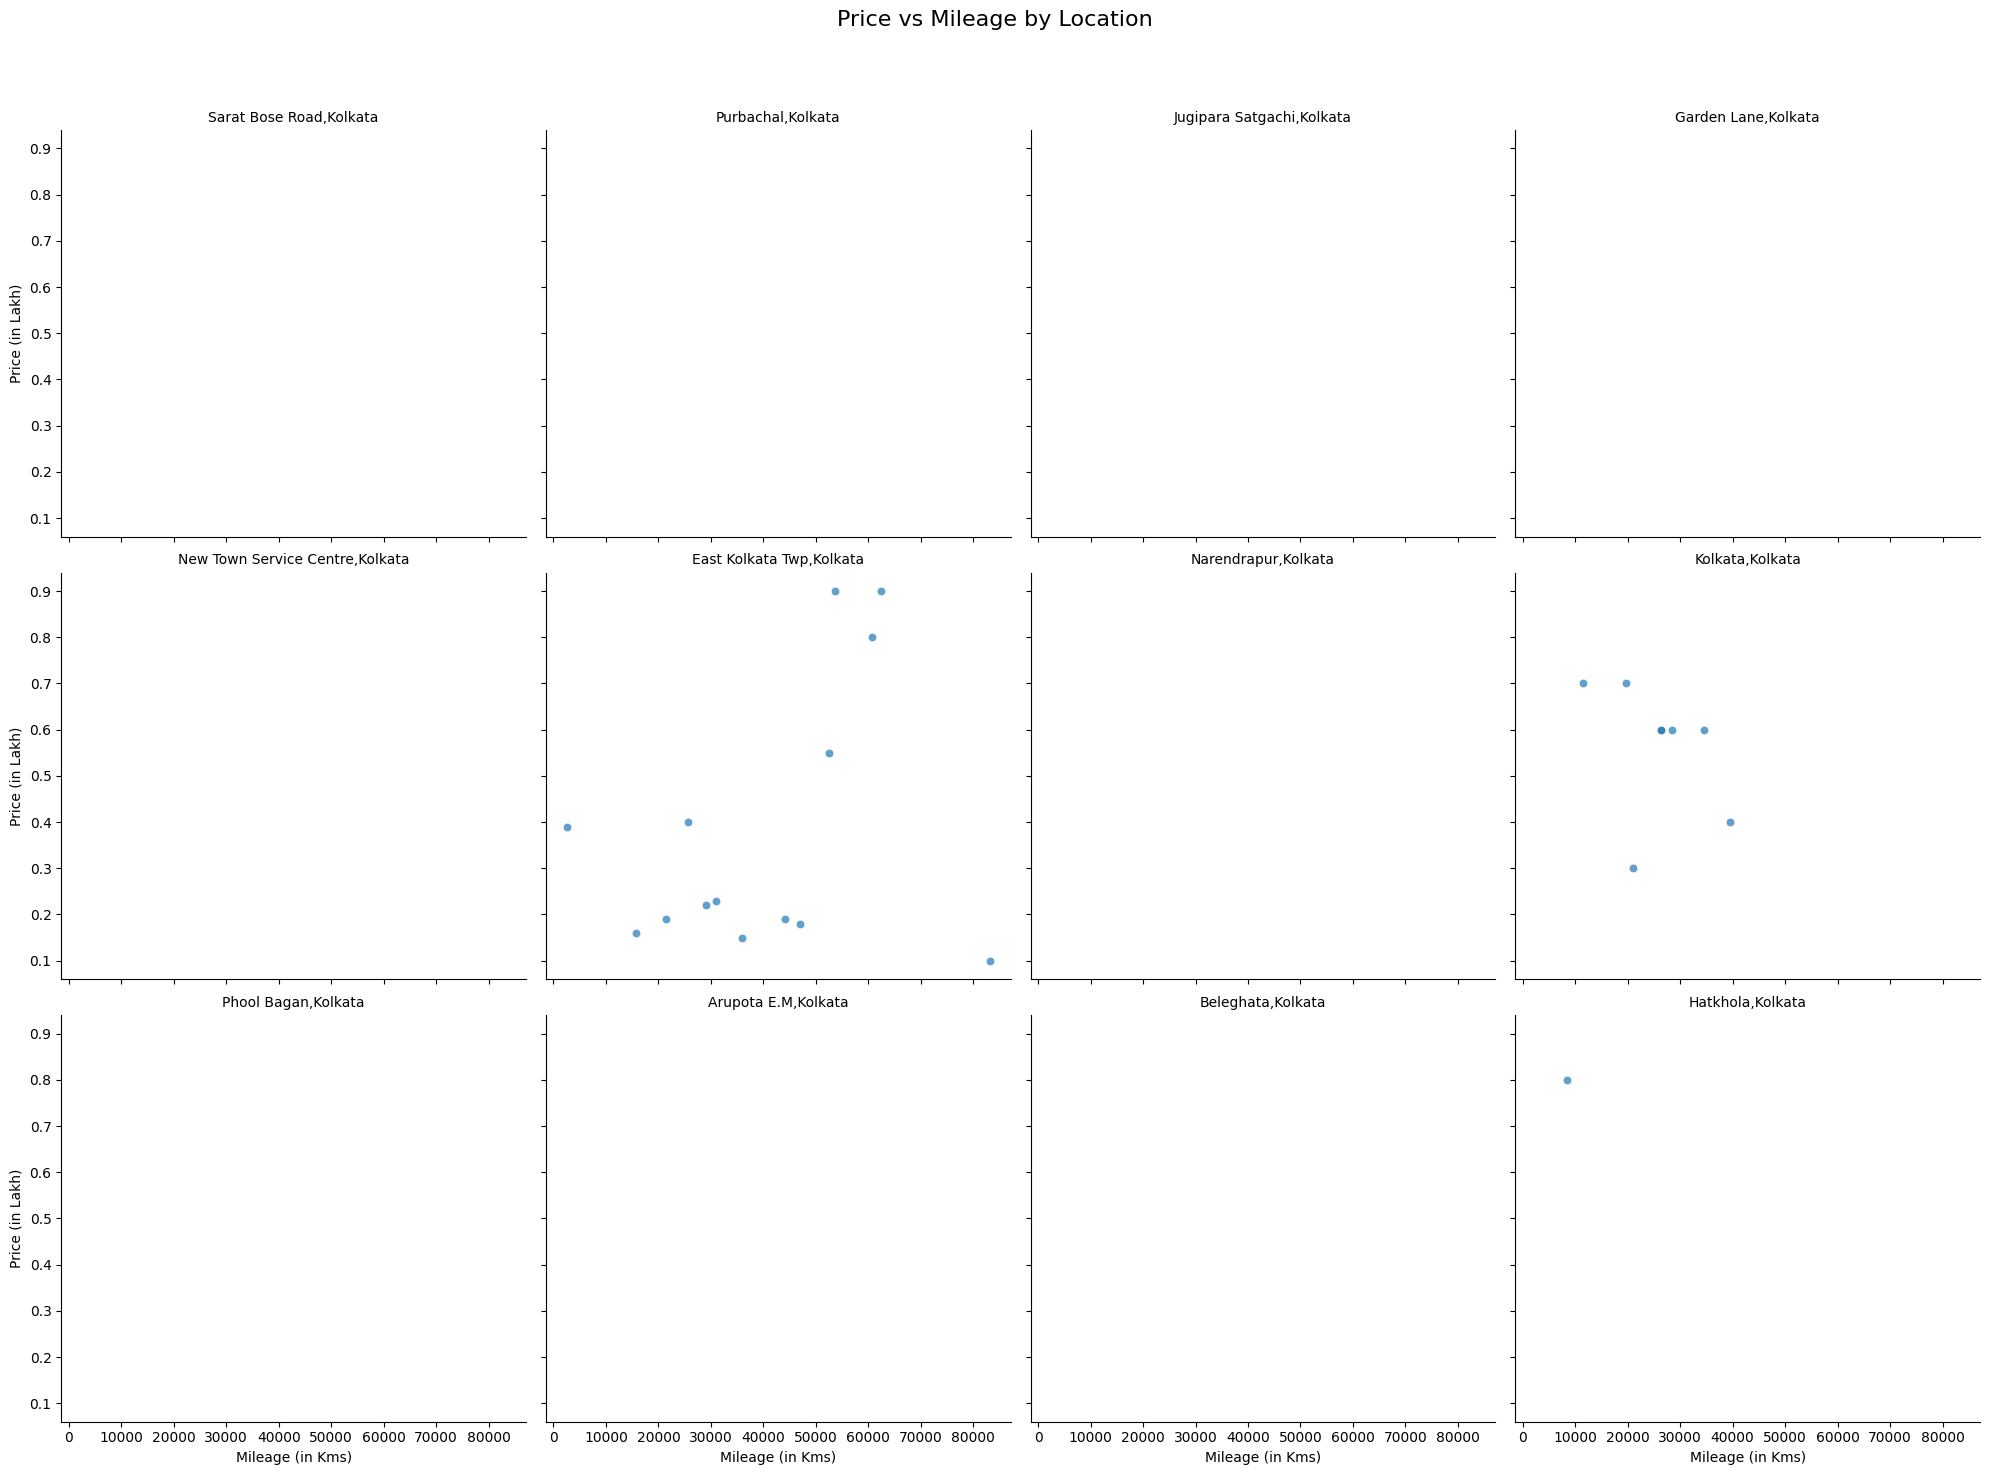

In [75]:
g = sns.FacetGrid(data, col="LOCATION", col_wrap=4, height=5)
g.map(sns.scatterplot, 'MILEGE(in Kms)', 'PRICE_CLEANED', alpha=.7)
g.set_axis_labels('Mileage (in Kms)', 'Price (in Lakh)')
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price vs Mileage by Location', fontsize=16)
plt.show()